### Problem 1
(a) 
$$
d(x^{(1)}, x^{(te)}) = \sqrt{0^2 + 3^2 + 0^2} = 3
$$
$$
d(x^{(2)}, x^{(te)}) = \sqrt{2^2 + 0^2 + 0^2} = 2
$$
$$
d(x^{(3)}, x^{(te)}) = \sqrt{0^2 + 3^2 + 0^2} = 3
$$
$$
d(x^{(4)}, x^{(te)}) = \sqrt{0^2 + 1^2 + 2^2} = \sqrt{5}
$$
$$
d(x^{(5)}, x^{(te)}) = \sqrt{(-1)^2 + 0^2 + 1^2} = \sqrt{2}
$$
$$
d(x^{(6)}, x^{(te)}) = \sqrt{1^2 + 1^2 + 2^2} = \sqrt{6}
$$

(b) $K = 3$, we need to find the closest 3 points to $x^{(te)}$. Since
$$
\sqrt{2} < 2 < \sqrt{5} < \sqrt{6} < 3
$$
so the closest 3 points are $\{x^{(5)}, x^{(4)}, x^{(2)}\}. The labels of these observations are Green, Green, Red. Because the amount of Green is larger than the amount of Red, the prediction should be
$$
\hat{y}^{(3)}(x^{(te)}; \mathcal{D}) = \text{Green} 
$$

(c) $K = 1$, and we know the closest point to $x^{(te)}$ is $x^{(5)}$, which is labeled to be Green. Therefore, the prediction should be
$$
\hat{y}^{(1)}(x^{(te)}; \mathcal{D}) = \text{Green} 
$$

(d) True. 3NN is more stable than 1NN since it utilizes information from 3 observations. 

### Problem 2
(a) False.

(b) As we uses more and more flexible methods, predictive error on testing data decreases at first, and starts to increase at some point. 

### Problem 3
(a) When $x = 0.5$, $[Y|X = 0.5] \sim \text{Uniform}[0.5 + cos(\pi) - .1, 0.5 + cos(\pi) + .1]$, $\Leftrightarrow [Y|X = 0.5] \sim \text{Uniform}[-0.6, -0.4]$
$$
f(0.5) = E[Y|X = 0.5] = \frac{-0.6-0.4}{2} = -0.5
$$

(b)
$$
var(Y|X = 0.5) = \frac{(-0.4+0.6)^2}{12} = \frac{1}{300}
$$

(c)

In [1]:
import numpy as np
import pandas as pd
np.random.seed(3)
num_samples = 100
X = np.random.uniform(0, 1, num_samples)
Y = np.zeros(num_samples)
for i in range(num_samples):
    Y[i] = np.random.uniform(X[i] + np.cos(2*np.pi*X[i]) - .1, X[i] + np.cos(2*np.pi*X[i]) + .1)
df = pd.DataFrame({'X': X, 'Y': Y})
df.head()

,X,Y
0,0.550798,-0.460283
1,0.708148,0.493337
2,0.290905,0.093700
3,0.510828,-0.392439
4,0.892947,1.745324


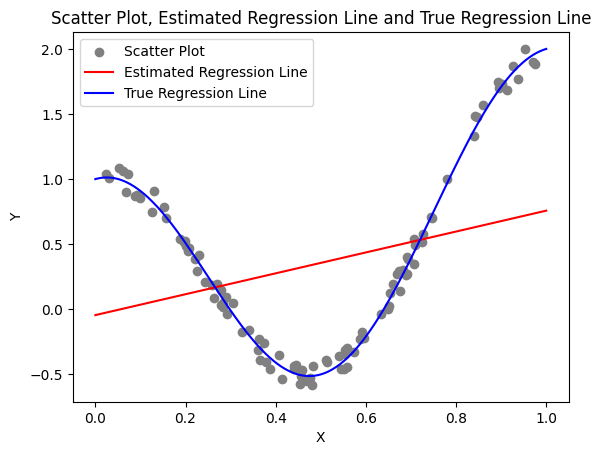

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
reg = LinearRegression()
reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
X_range = np.linspace(0, 1, 500).reshape(-1,1)
Y_predicted_range = reg.predict(X_range)
Y_true_range = X_range.flatten() + np.cos(2*np.pi*X_range.flatten())
plt.scatter(df['X'], df['Y'], color='gray', label='Scatter Plot')
plt.plot(X_range, Y_predicted_range, color='red', label='Estimated Regression Line')
plt.plot(X_range, Y_true_range, color='blue', label='True Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot, Estimated Regression Line and True Regression Line')
plt.legend()
plt.show()

In [3]:
t = np.array(0.5).reshape(1, 1)
reg.predict(t)

array([[0.35654477]])

the value of $\hat{f}(0.5; \mathcal{D}) = 0.35654477$. 

(d)

(array([ 5.,  1.,  4.,  5.,  8.,  8., 12., 22., 25., 32., 45., 39., 54.,
        38., 46., 30., 37., 22., 16., 23., 12.,  9.,  3.,  3.,  1.]),
 array([0.28126373, 0.29778694, 0.31431015, 0.33083336, 0.34735657,
        0.36387978, 0.38040299, 0.3969262 , 0.41344941, 0.42997262,
        0.44649583, 0.46301904, 0.47954225, 0.49606546, 0.51258867,
        0.52911188, 0.54563509, 0.5621583 , 0.57868151, 0.59520472,
        0.61172793, 0.62825114, 0.64477435, 0.66129756, 0.67782076,
        0.69434397]),
 <BarContainer object of 25 artists>)

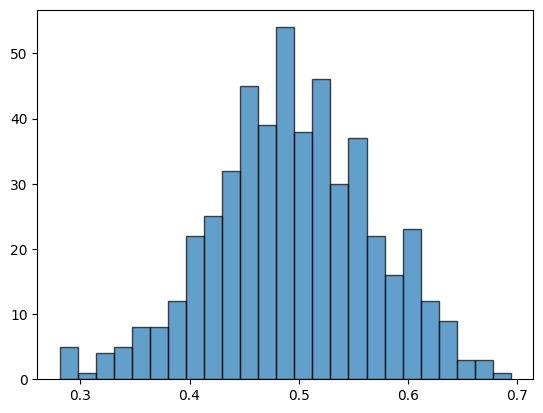

In [4]:
preds = []
for i in range(500):
    X = np.random.uniform(0, 1, num_samples)
    Y = np.zeros(num_samples)
    for i in range(num_samples):
        Y[i] = np.random.uniform(X[i] + np.cos(2*np.pi*X[i]) - .1, X[i] + np.cos(2*np.pi*X[i]) + .1)
    reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
    preds.append(reg.predict(t)[0,0])
plt.hist(preds, bins = 25, edgecolor='black', alpha=0.7)

(e)

In [5]:
np.mean(preds)

0.4946333782077157

The mean value of $\texttt{preds} = 0.4946$ is very close to $f(0.5; \mathcal{D}) = 0.5$, which suggests that the ordinary least squares estimator $\hat{f}(0.5; \mathcal{D})$ is likely to be an unbiased estimator. 

(f) 

In [6]:
np.var(preds)

0.005444152719909934

The variance of $\texttt{preds} = 0.0054$. This tells us that the variance of ordinary least square is not likely to decrease to 0 even if the sample size is large. 

(g) We apply Monte Carlo methods as well as (e) and (f), with test data $(X, Y)$ where $X = 0.5$ and $Y \sim Uniform(-0.6, 0.4)$

In [7]:
errors = 0
for i in range(500):
    X = np.random.uniform(0, 1, num_samples)
    Y = np.zeros(num_samples)
    for i in range(num_samples):
        Y[i] = np.random.uniform(X[i] + np.cos(2*np.pi*X[i]) - .1, X[i] + np.cos(2*np.pi*X[i]) + .1)
    Y_new = np.random.uniform(-0.6, -0.4)
    reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
    errors = errors + (reg.predict(t)[0,0] - Y_new)**2
errors/500

1.015130426087126

Our estimation is $1.0151$. We can carefully infer that the expected value of the squared error of our prediction is $1$. 

### Problem 4
10-12 hours. 